# Simulation and Performance Evaluation - Homework 1

### University of Trento - A.Y. 2019 / 2020

Lotito Quintino Francesco - 215032

Zanella Davide - 211463

---

**Important:** we expect the datasets to be in the same directory of this notebook.

## Exercise 1

### Problem statement

Load the iid data samples from the CSV file `data_ex1.csv` and provide:
1. the median and a 95% confidence interval for the median
2. the mean, a 95% and a 99% confidence interval for the mean

Explain which formulas you used and why.

### Solution

Firstly, we need to load the data from `data_ex1.csv`. We also sort the input data, which will be useful later.


In [898]:
def load():
    file = open("data_ex1.csv", "r")
    data = [float(x) for x in file.readlines()]
    return data

In [899]:
data = sorted(load())
print("Number of samples loaded: ", len(data))

Number of samples loaded:  1000


In this figure we can visualize the distribution of the data loaded from the given dataset.

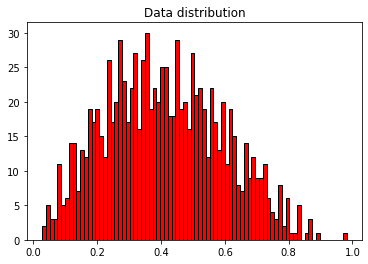

In [900]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(data, bins=80, color = 'red', edgecolor = 'black')
plt.title('Data distribution')
plt.show()

We are asked to compute the median of the input data, the median is the value separating the higher half from the lower half of a data sample. 

The median is computed by the function `compute_median` which takes the list of values as a parameter and returns the median of the data. 

Let $L$ be the sorted input list and $n = |L|$. Since the list is sorted, if $n$ is odd the median is $L_{\frac{n+1}{2}}$, if $n$ is even the median is the arithmetic mean of $L_{\frac{n}{2}}$ and $L_{\frac{n+1}{2}}$.

In our case, the cardinality of the input data is 1000, so it is even.

In [901]:
def compute_median(values):
    # we need to sort the values
    values = list(sorted(values)) 
    n = len(values)
    if(n % 2 != 0):
        # odd case
        idx = int((n+1) / 2)
        return values[idx]
    else:
        # even case
        idx = int(n/2)
        return (values[idx] + values[idx + 1]) / 2

In [902]:
median = compute_median(data)

In [903]:
print("Median: ", median)

Median:  0.4034808006202


Here we load some standard math function which will be useful later.

In [904]:
from math import floor, ceil, sqrt

Now we are asked to compute a 95% confidence interval for the median. This interval is constructed from the observed data such that, with at least 95% probability, the true population value of the median falls in it. Since the input data is iid and is ordered, we can rely on Theorem 2.1 from the slides of the lecture "Lesson on statistical summaries, confidence/prediction intervals, and the iid assumption" and compute lower and upper bounds of the requested confidence interval. 

We will use the some notation of the slides, meaning $j$ is the lower bound and $k$ is the upper bound.

In [905]:
# compute j, k for confidence level 95%
def get_j_k(values):
    n = len(values)
    j_idx = floor(0.5 * n - 0.98 * sqrt(n))
    k_idx = ceil(0.5 * n + 1 + 0.98 * sqrt(n))
    return j_idx, k_idx

In [906]:
j, k = get_j_k(data)
print("j:", j)
print("k:", k)

j: 469
k: 532


In [907]:
j_val, k_val = data[j], data[k]
print("95% confidence interval for the median: [{}, {}]".format(j_val, k_val))

95% confidence interval for the median: [0.384475528575523, 0.417181958327227]


For the next step, we are asked to compute the mean of the observed data and to compute a 95% and a 99% confidence interval for the mean. We define a function `compute_mean` which obviously takes the list of values as a parameter and returns the arithmetic mean of them.

In [908]:
def compute_mean(values):
    tot = 0
    for i in values:
        tot += i
    return tot / len(values)

In [909]:
mean = compute_mean(data)
print("Mean:", mean)

Mean: 0.41020458058272363


We also define a function `compute_std_dev` which takes the list of values as a parameter, computes the mean and returns the standard deviation of the input values.

In [910]:
def compute_std_dev(values):
    mean = compute_mean(values)
    tot = 0
    for i in values:
        tot += (i - mean) ** 2
    return sqrt(tot / len(values))

In [911]:
std_dev = compute_std_dev(data)
print("Standard deviation:", std_dev)

Standard deviation: 0.18280369403703178


In [912]:
def mean_interval(data, gamma):
    eta = None
    if gamma == 0.95:
        eta = 1.960
    elif gamma == 0.99:
        eta = 2.576
    else:
        # in these excercises we are only interested in 95% and 99% confidence
        pass
    mean = compute_mean(data)
    std_dev = compute_std_dev(data)
    incr = eta * std_dev / sqrt(len(data))
    return mean - incr, mean + incr

In [913]:
start, end = mean_interval(data, 0.95)
print("Confidence interval for mean with gamma 95%: [{}, {}]".format(start, end))

Confidence interval for mean with gamma 95%: [0.39887429024087223, 0.42153487092457503]


In [914]:
start, end = mean_interval(data, 0.99)
print("Confidence interval for mean with gamma 99%: [{}, {}]".format(start, end))

Confidence interval for mean with gamma 99%: [0.39531334184771894, 0.42509581931772833]


## Exercise 2

### Problem statement

Load the data from the CSV file `data_ex2.csv`. This should be a matrix with 6001 rows and 200 columns. All entries are iid.

1. Find a 95% confidence interval for the data of the first row.
2. Find the mean of all the remaining 6000 rows, and check how many of these means fall inside the confidenceinterval you computed for the first row. Is this what you expected? Explain.

### Solution

In [915]:
def load():
    file = open("data_ex2.csv", "r")
    values = [[float(x) for x in line.split(",")] for line in file.readlines()]
    return values

In [916]:
values = load()

print("Number of values:", len(values))

Number of values: 6001


In [917]:
first_row = values[0]
print("Number of elements in the first row:", len(first_row))

Number of elements in the first row: 200


In [918]:
s = compute_std_dev(first_row)
print("Standard deviation of the first row:", s)

Standard deviation of the first row: 1.709792005976982


In [919]:
start, end = mean_interval(first_row, 0.99)
print("Confidence interval for mean with gamma 95% of the first row: [{}, {}]".format(start, end))

Confidence interval for mean with gamma 95% of the first row: [2.863608391655729, 3.486488036510208]


In [920]:
count = 0
for row in values[1:]:
    m = compute_mean(row)
    if m <= end and m >= start:
        count += 1

print("Number of rows with mean falling in the confidence interval:", count)

Number of rows with mean falling in the confidence interval: 4958


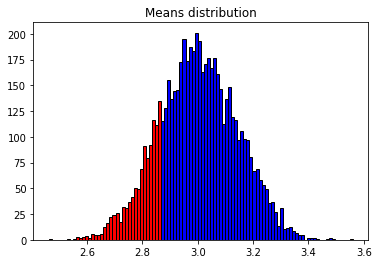

In [922]:
%matplotlib inline
import matplotlib.pyplot as plt 

mean_values = [compute_mean(x) for x in values]

N, bins, patches = plt.hist(mean_values, bins=100, color = 'red', edgecolor = 'black')


for i in range(len(patches)):
    if bins[i] <= end and bins[i] >= start:
        patches[i].set_facecolor('b')
    else:
        patches[i].set_facecolor('r')
        

plt.title('Means distribution') 

plt.show() 

## Exercise 3

### Problem statement

Load the data from the CSV file `data_ex3.csv`.

1. Compute the CoV for the data, Jain’s fairness index and the Lorenz curve gap
2. Plot the Lorenz curve; discuss the correspondence with the values of the previous point, and the difference between the values of the Lorenz curve gap and of Jain’s fairness index.
3. Implement the bootstrap algorithm seen in class and use it to compute 95% and 99% confidence intervals for:    
    (a) the Lorenz curve gap;    
    (b) Jain’s fairness index;    
    (c) the mean of the data;    
    (d) the standard deviation of the data,
    
4. Compare the obtained confidence interval for the mean with the one obtained via the asymptotic formulas. Discuss.


### Solution

Firstly, we need to load the data from `data_ex3.csv`.

In [851]:
def load():
    file = open("data_ex3.csv", "r")
    values = [float(x) for x in file.readlines()]
    return values

In [852]:
values = load()
print("Number of values:", len(values))

Number of values: 500


In [853]:
m = compute_mean(values)
print("Mean:", m)

Mean: 4.084097581606038


In [854]:
s = compute_std_dev(values)
print("Standard deviation:", s)

Standard deviation: 4.086005532648478


The Coefficient of Variation summarizes the variation of data around the mean.
It's computed by $CoV = \frac{s}{m}$.

The value obtained indicates the variation of the dataset in relation with its mean.

In [855]:
def compute_cov(values):
    m = compute_mean(values)
    s = compute_std_dev(values)

    return s / m

In [856]:
cov = compute_cov(values)
print("CoV:", cov)

CoV: 1.000467165880422


We obtained a Coefficient of Variation slightly higher than 1, meaning that the dataset has high variance.

The Jain’s fairness index can be computed as $JFI = \frac{1}{1 + CoV^2}$.

It's equal to 1 when all the values of the dataset are equal and $\frac{1}{n}$ when we have the maximum unfairness in the data.

In [857]:
def compute_jfi(values):
    cov = compute_cov(values)
    return 1 / (1 + cov ** 2)

In [858]:
jfi = compute_jfi(values)
print("Jain’s fairness index:", jfi)
print("Maximum possible unfairness of the dataset:", 1/len(values))

Jain’s fairness index: 0.499766471620773
Maximum possible unfairness of the dataset: 0.002


The Jain’s fairness index obtained is low, closer to the maximum unfairness value of the dataset rather than 1.
It tells us what the Coefficient of Variation previously said: the dataset has high variance.

The Lorenz Curve Gap is computed by $\frac{\frac{1}{n}\sum_{i=1}^{n}\mid x_i - m \mid}{2m}$. As the nominator there is the Mean Absolute Deviation.

The Lorenz Curve Gap is bounded by 0 and $1 - \frac{1}{n}$.

In [859]:
def compute_lorenz_cg(values):
    mean = compute_mean(values)
    tot = 0
    for i in values:
        tot += abs(i - mean)

    mad = tot / len(values)
    return mad / (2 * mean)

In [860]:
lorenz_gap = compute_lorenz_cg(values)
print("Lorenz Curve Gap:", lorenz_gap)

Lorenz Curve Gap: 0.36230444707595716


In this case the Lorenz Curve Gap is bounded by 0 and 0.999.

The higher the gap, the higher the variance of the data.

In [861]:
def lorenz_curve(values):
    x = []
    y = []

    mean = compute_mean(values)
    values = sorted(values)
    n = len(values)
    tot = 0
    for i in range(len(values)):
        x.append((i + 1) / n)
        tot += values[i]
        y.append(tot / (n * mean))

    return x, y

The Lorenz Curve shows how much the data are far from the ideal fairness of the data.

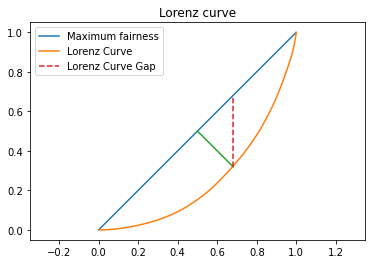

In [862]:
%matplotlib inline
import matplotlib.pyplot as plt 

from math import sin, cos, radians


x = y = [0, 1 - 1/len(values)]
plt.plot(x, y, label='Maximum fairness') 

x, y = lorenz_curve(values)
plt.plot(x, y, label='Lorenz Curve')


dist = lorenz_gap * cos(radians(45))
dist = dist * cos(radians(45))


lc_x = [0.5, 0.5 + dist]
lc_y = [0.5, 0.5 - dist]
plt.plot(lc_x, lc_y)

lcg_x = [0.5 + dist, 0.5 + dist]
lcg_y = [0.5 - dist, 0.5 + dist]
plt.plot(lcg_x, lcg_y, linestyle='dashed', label='Lorenz Curve Gap')

plt.axis('equal')
plt.title('Lorenz curve') 
plt.legend()

plt.show() 

The blue line is the maximum fairness that the data could have, while the orange one is the Lorenz Curve.

The Lorenz Curve Gap is the dashed line in red.

**TODO: compare Lorenz Curve Gap with Jaine's Fairness index**

***

Now we have to use the bootstrap algorithm, so, firstly, we decide a value for the r0 variable, which will, later on, decide the number of iterations, so the precision of the bootstrap.

We choose 25 to avoid too much computation.

In [863]:
r0 = 25

With the bootstrap method we use the empirical distribution in place of the theoretical (unknown) distribution. 

Basically we calculate the desired metric on a new dataset created by randomly selecting, with repetitions, N elements from the original dataset.
This process is repeated in order to obtain a good estimation of the confidence interval.

Because of the random, every time we recompute the same bootstrap for a metric, we obtain a slightly different confidence interval.

In [864]:
import random as rnd

def bootstrap(values, r0, gamma, t_func):
    R = ceil(2 * r0 / (1 - gamma)) - 1
    n = len(values)
    T = []
    for r in range(R):
        samples = []
        for _ in range(n):
            idx = rnd.randrange(0, n)
            samples.append(values[idx])
        stat = t_func(samples)
        T.append(stat)
    T = sorted(T)
    return T[r0], T[R + 1 - r0]

In [865]:
fn = lambda a: compute_lorenz_cg(a)

start, end = bootstrap(values, r0, 0.95, fn)
print("Bootstrap of Lorenz curve gap 95%: [{}, {}]".format(start, end))

start, end = bootstrap(values, r0, 0.99, fn)
print("Bootstrap of Lorenz curve gap 99%: [{}, {}]".format(start, end))

Bootstrap of Lorenz curve gap 95%: [0.340734648888233, 0.38524914168273394]
Bootstrap of Lorenz curve gap 99%: [0.3325476168557816, 0.39169405957970216]


In [866]:
fn = lambda a: compute_jfi(a)

start, end = bootstrap(values, r0, 0.95, fn)
print("Bootstrap of Jain’s fairness index 95%: [{}, {}]".format(start, end))

start, end = bootstrap(values, r0, 0.99, fn)
print("Bootstrap of Jain’s fairness index 99%: [{}, {}]".format(start, end))

Bootstrap of Jain’s fairness index 95%: [0.4597106503064137, 0.5448275547730641]
Bootstrap of Jain’s fairness index 99%: [0.4446546727439674, 0.562980636646075]


In [867]:
fn = lambda a: compute_mean(a)

b_m_s_95, b_m_e_95 = bootstrap(values, r0, 0.95, fn)
print("Bootstrap of Mean 95%: [{}, {}]".format(b_m_s_95, b_m_e_95))

b_m_s_99, b_m_e_99 = bootstrap(values, r0, 0.99, fn)
print("Bootstrap of Mean 99%: [{}, {}]".format(b_m_s_99, b_m_e_99))

Bootstrap of Mean 95%: [3.724346059421885, 4.454023502211518]
Bootstrap of Mean 99%: [3.632445118882223, 4.565302782370128]


In [868]:
fn = lambda a: compute_std_dev(a)

start, end = bootstrap(values, r0, 0.95, fn)
print("Bootstrap of Standard deviation 95%: [{}, {}]".format(start, end))

start, end = bootstrap(values, r0, 0.99, fn)
print("Bootstrap of Standard deviation 99%: [{}, {}]".format(start, end))

Bootstrap of Standard deviation 95%: [3.546657942544189, 4.594101130028955]
Bootstrap of Standard deviation 99%: [3.4344054532767854, 4.780931572913354]


In [869]:
m_s_95, m_e_95 = mean_interval(values, 0.95)
print("Confidence interval for mean with gamma 95%: [{}, {}]".format(m_s_95, m_e_95))

m_s_99, m_e_99 = mean_interval(values, 0.99)
print("Confidence interval for mean with gamma 99%: [{}, {}]".format(m_s_99, m_e_99))

Confidence interval for mean with gamma 95%: [3.7259434054103022, 4.442251757801773]
Confidence interval for mean with gamma 99%: [3.613380664320214, 4.5548144988918615]


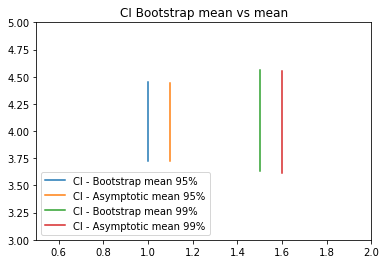

In [870]:
%matplotlib inline
import matplotlib.pyplot as plt 

b_m_y = [b_m_s_95, b_m_e_95]
b_m_x = [1, 1]
plt.plot(b_m_x, b_m_y, label='CI - Bootstrap mean 95%')

m_y = [m_s_95, m_e_95]
m_x = [1.1, 1.1]
plt.plot(m_x, m_y, label='CI - Asymptotic mean 95%')


b_m_y = [b_m_s_99, b_m_e_99]
b_m_x = [1.5, 1.5]
plt.plot(b_m_x, b_m_y, label='CI - Bootstrap mean 99%')

m_y = [m_s_99, m_e_99]
m_x = [1.6, 1.6]
plt.plot(m_x, m_y, label='CI - Asymptotic mean 99%')


plt.ylim(3, 5)
plt.xlim(0.5, 2)
plt.legend()
plt.title('CI Bootstrap mean vs mean') 

plt.show() 

## Exercise 4

### Problem statement

Load the data from the CSV file `data_ex4.csv`.

1. Give a 95% and a 99% confidence interval for the mean using the bootstrap method.
2. Compare the results against the value obtained from the asymptotic formulas. Explain.
3. Transform the data using a log transformation and give the a confidence interval for the transformed mean.

### Solution

In [871]:
def load():
    file = open("data_ex4.csv", "r")
    values = [float(x) for x in file.readlines()]
    return values

In [872]:
values = load()
print("Number of values:", len(values))

Number of values: 500


In [873]:
m = compute_mean(values)
print("Mean:", m)

Mean: 4193.326330220401


In [874]:
s = compute_std_dev(values)
print("Standard deviation:", s)

Standard deviation: 84564.22566364624


In [875]:
r0 = 25

In [876]:
fn = lambda a: compute_mean(a)

start, end = bootstrap(values, r0, 0.95, fn)
print("Bootstrap of Mean 95%: [{}, {}]".format(start, end))

start, end = bootstrap(values, r0, 0.99, fn)
print("Bootstrap of Mean 99%: [{}, {}]".format(start, end))

Bootstrap of Mean 95%: [95.34739152839184, 11961.479120419763]
Bootstrap of Mean 99%: [56.694373745817, 18985.093711463196]


In [877]:
start, end = mean_interval(values, 0.95)
print("Confidence interval for mean with gamma 95%: [{}, {}]".format(start, end))

start, end = mean_interval(values, 0.99)
print("Confidence interval for mean with gamma 99%: [{}, {}]".format(start, end))

Confidence interval for mean with gamma 95%: [-3219.0548660825725, 11605.707526523376]
Confidence interval for mean with gamma 99%: [-5548.660384920649, 13935.313045361452]


In [878]:
from math import log, exp

log_values = [log(x) for x in values]

log_mean = compute_mean(log_values)
log_std = compute_std_dev(log_values)

In [879]:
trans_mean = exp(log_mean)
print("Transformation mean:", trans_mean)

Transformation mean: 2.272258276241015


In [880]:
trans_std = exp(log_std)
print("Transformation standard deviation:", trans_std)

Transformation standard deviation: 13.497052033074423


In [881]:
start, end = mean_interval(log_values, 0.95)
start, end = exp(start), exp(end)
print("Confidence interval for transformation mean with gamma 95%: [{}, {}]".format(start, end))

start, end = mean_interval(log_values, 0.99)
start, end = exp(start), exp(end)
print("Confidence interval for transformation mean with gamma 99%: [{}, {}]".format(start, end))

Confidence interval for transformation mean with gamma 95%: [1.8087889005696096, 2.85448328012177]
Confidence interval for transformation mean with gamma 99%: [1.6836493944528799, 3.0666465898166484]


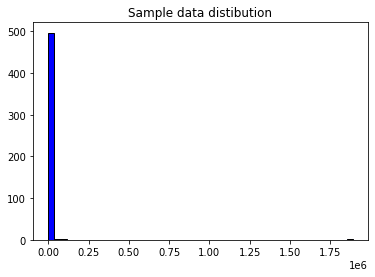

In [882]:
%matplotlib inline
import matplotlib.pyplot as plt 

plt.hist(values, bins=50, color = 'blue', edgecolor = 'black')
plt.title('Sample data distibution') 
plt.show() 

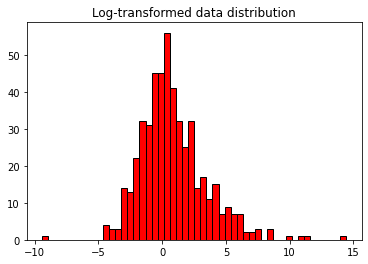

In [883]:
%matplotlib inline
import matplotlib.pyplot as plt 

plt.hist(log_values, bins=50, color = 'red', edgecolor = 'black')
plt.title('Log-transformed data distribution') 
plt.show() 

## Exercise 5

### Problem statement

Load the data from the CSV file `data_ex5.csv`. Note that this data represents successes (ones) and insuccesses (zeros) of some experiment.

1. Find the probability of success and confidence intervals for it at both a 95% and at a 99% level.
2. Consider now only the first 15 data points.  Find a confidence interval for the probability of success. Explain.

### Solution

Firstly, we need to load the data from `data_ex5.csv`.

In [884]:
def load():
    file = open("data_ex5.csv", "r")
    values = [int(x) for x in file.readlines()[0].split(',')]
    return values

In [885]:
samples = load()
print("Length of the sequence:", len(samples))

Length of the sequence: 1000


The dataset is made up of a sequence of zeroes and ones, which is the representation of the outcomes of a repeated experiment. A zero represents a failure, a one represents a success.

In [886]:
succ = samples.count(1)
insucc = samples.count(0)

In [887]:
print("Number of successes: {}".format(succ))
print("Number of insuccesses: {}".format(insucc))

Number of successes: 125
Number of insuccesses: 875


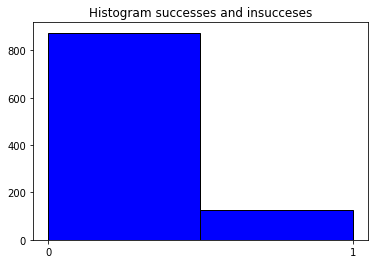

In [888]:
%matplotlib inline
import matplotlib.pyplot as plt 

plt.hist(samples, bins=2, color = 'blue', edgecolor = 'black')
plt.xticks(range(2))
plt.title('Histogram successes and insucceses') 
plt.show() 

The given sequence is a Bernoulli process: every experiment is a Bernoulli trial with probability of success $p$. We assume the data is iid, so each experiment is independent from the others and all the experiments have the same Bernoulli distribution.

We want to estimate the parameters of the distribution of our interest. In this case we have a Bernoulli distribution, which depends only from one parameter: the probability of success $p$. The parameter $p$ is unknown but we have some observed data. We can rely on Maximum Likelihood Estimation and select the estimator $\hat{p}$ that makes the observed data the most likely. In this case, it is well-known that (by MLE) $\hat{p}$ = $\frac{\sum_{i=1}^{n} X_i}{n}$, where $n$ is the length of the observed sequence of data and $X_i$ is the realization of the random variable associated with the experiment $i$.

In [889]:
p = succ / (succ + insucc)
print("Estimation of the probability of success p:", p)

Estimation of the probability of success p: 0.125


For example, now we can also estimate the variance $\hat{\sigma}^2 = \hat{p}(1-\hat{p})$.

In [890]:
var = p * (1 - p)
print("Estimation of the variance: ", var)

Estimation of the variance:  0.109375


We are asked to compute the confidence intervals for the probability of success $p$ at both a 95% and at a 99% level. We resort to the `mean_interval` function, introduced in Exercise 1.

In [891]:
start, end = mean_interval(samples, 0.95)
print("95% confidence interval for p: [{}, {}]".format(start, end))

start, end = mean_interval(samples, 0.99)
print("99% confidence interval for p: [{}, {}]".format(start, end))

95% confidence interval for p: [0.10450182934991514, 0.14549817065008486]
99% confidence interval for p: [0.09805954714560276, 0.15194045285439722]


For the next step of the exercise, we are asked to consider only the first 15 data points.

In [892]:
first_15_samples = samples[:15]

In [893]:
print(first_15_samples)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [894]:
succ = first_15_samples.count(1)
insucc = first_15_samples.count(0)
print("Number of successes: {}".format(succ))
print("Number of insuccesses: {}".format(insucc))

Number of successes: 0
Number of insuccesses: 15


We can repeat again the process of estimating the value of the parameter $p$, but this time considering only this extremely small subset of the original data.

In [895]:
p = succ / (succ + insucc)
print("Estimation of the probability of success:", p)

Estimation of the probability of success: 0.0


It is trivial to notice that with less samples we get a less precise estimation of $p$. 

In particular, in this case, the first 15 observations happen to be only failures. To estimate a confidence interval we need to rely on the Rule of three. 

The Rule of three states that if a certain event did not occur in a sample with $n$ outcomes, the interval $[0,\frac{3}{n}]$ is a 95% confidence interval for the rate of occurrences in the population.

In [896]:
print("95% confidence interval for p with the Rule of three: [{}, {}]".format(0, 3 / len(first_15_samples)))

95% confidence interval for p with the Rule of three: [0, 0.2]
